In [12]:
#this is for my coursera course on Statistics on Data Science
#For module 7 I have to make an ipnyb file about the Charle s River dataset
#This is the code to read the data and plot it
#I think I need to use pandas and matplotlib since I also need to plot the data (boxplot and bar plot).
#BTW I need to use the Boston Housing dataset, which I admit have no idea what it is because I am from Philippines and not familiar with it.
#Let alone who knows there might be a lot of similar datasets!

%pip install seaborn

#I have to install seaborn first 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Found the dataset on github

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()



Note: you may need to restart the kernel to use updated packages.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Median value of owner-occupied homes: 21.2


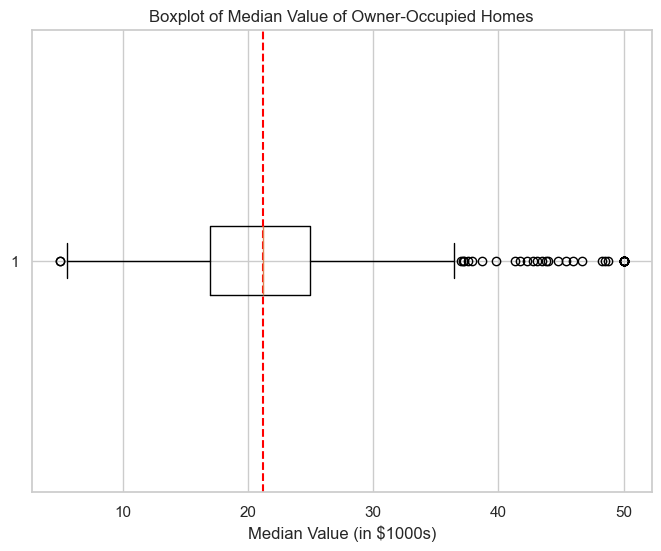

In [22]:
#1st task: Find the median value of owner-occupied homes
#also provide a boxplot of it

median_value = df['medv'].median()
print(f"Median value of owner-occupied homes: {median_value}")

plt.figure(figsize=(8, 6))
plt.grid(True)
plt.boxplot(df['medv'], vert=False)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value (in $1000s)')
plt.axvline(median_value, color='red', linestyle='--', label='Median Value')
plt.show()



C:\Users\Christelle Joy\AppData\Local\Temp\ipykernel_4980\1502714144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chas', data=df, palette='Set2')


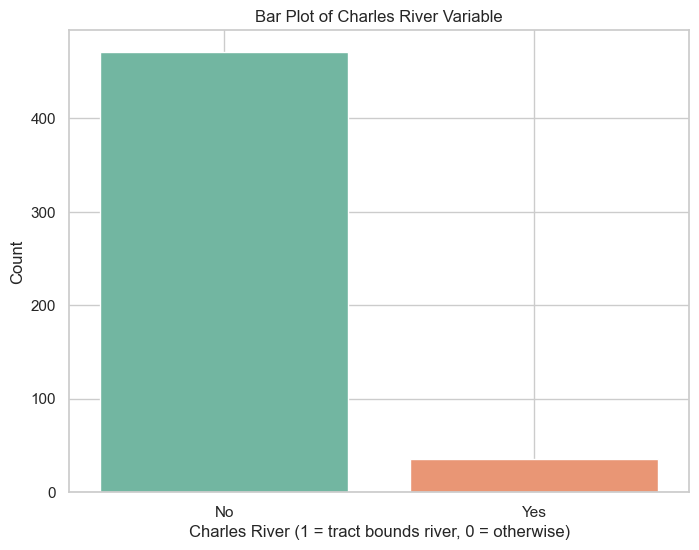

In [ ]:
#2nd task: Make a bar plot of teh Charles River variable

plt.figure(figsize=(8, 6))
sns.countplot(x='chas', data=df, palette='Set2')
plt.grid(True)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1 = tract bounds river, 0 = otherwise)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#wow that's a huge difference between houses located near the river and not.

C:\Users\Christelle Joy\AppData\Local\Temp\ipykernel_4980\2478503014.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='medv', data=df, palette='Set2')


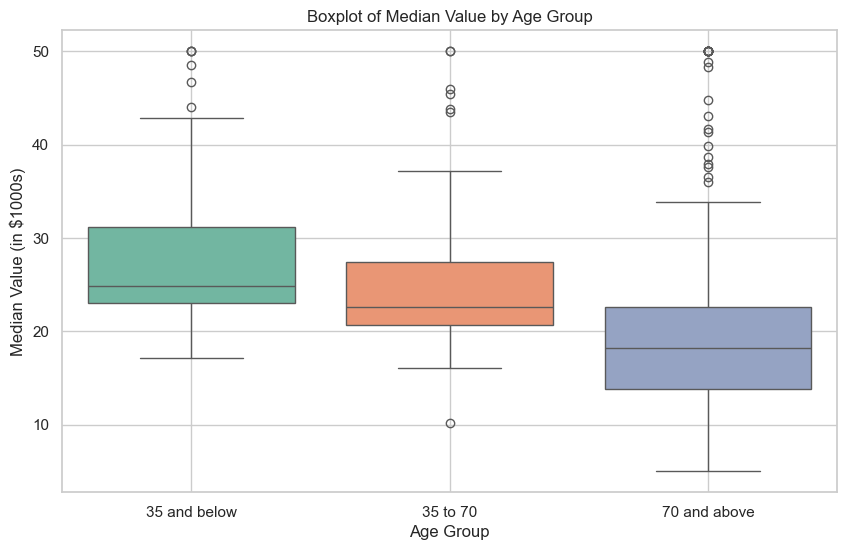

In [33]:
#3rd task: Make a boxplot between MEDV variable and AGE variable
#group it as 35 years old and below, 35 to 70 years old, and 70 years old and above.

#I gotta make  some new columns

df['age_group'] = pd.cut(df['age'], bins=[0, 35, 70, 100], labels=['35 and below', '35 to 70', '70 and above'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='medv', data=df, palette='Set2')
plt.title('Boxplot of Median Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.grid(True)
plt.show()


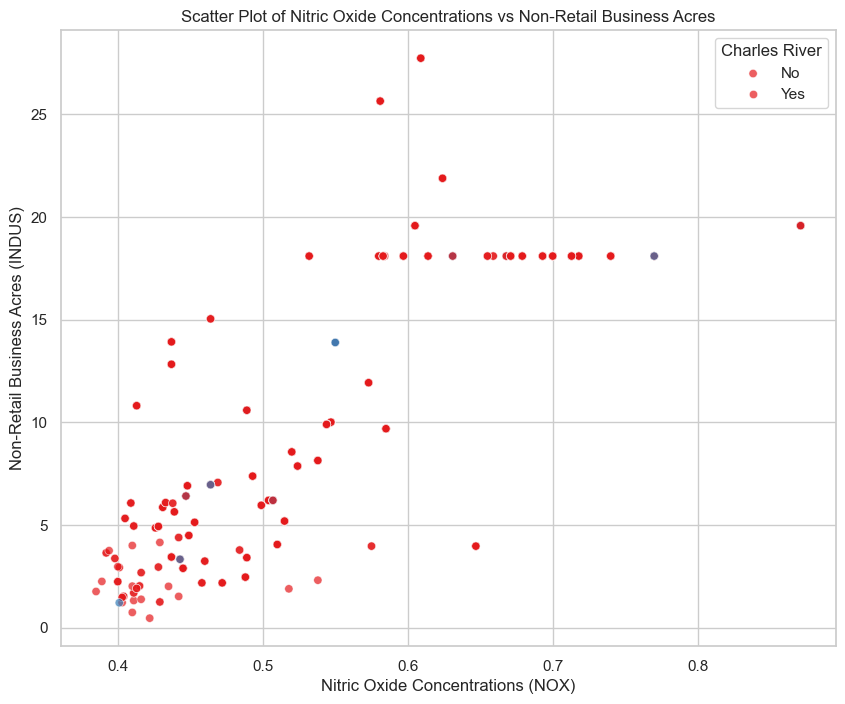

In [45]:
#4th task: Make a scatter plot between Nitric Oxide Concentrations and non-retail business acres per town
#Take note: NOX = Nitric Oxide Concertrations
#Take note: INDUS = non-retail business acres per town

plt.figure(figsize=(10, 8))
sns.scatterplot(x='nox', y='indus', data=df, hue='chas', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Non-Retail Business Acres (INDUS)')
plt.grid(True)
plt.legend(title='Charles River', loc='upper right', labels=['No', 'Yes'])
plt.show()

#I can't see much of the scatter plot its just way too small dots!


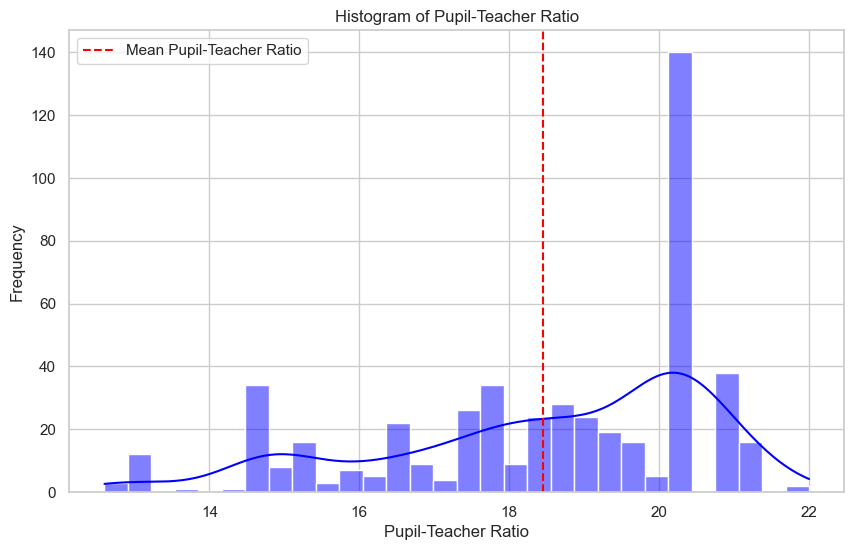

In [46]:
#5th task: Make a histogram for the pupil to teacher ratio

plt.figure(figsize=(10, 6))
sns.histplot(df['ptratio'], bins=30, kde=True, color='blue')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(df['ptratio'].mean(), color='red', linestyle='--', label='Mean Pupil-Teacher Ratio')
plt.legend()
plt.show()



In [48]:
#1st question: Is there a significant difference in median value of houses bounded by the Charles river or not? 
# (T-test for independent samples)

# Null Hypothesis (H0) : There's no significant difference between two variables.
# Alternate Hypothesis (Ha) : There is a significant difference between the two variables.
# alpha = 0.05

from scipy import stats
#I need to separate the data into two groups based on the 'chas' variable
group_with_river = df[df['chas'] == 1]['medv']
group_without_river = df[df['chas'] == 0]['medv']
t_stat, p_value = stats.ttest_ind(group_with_river, group_without_river)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles river or not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses bounded by the Charles river or not.")  



T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median value of houses bounded by the Charles river or not.


In [49]:
#2nd question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
#Need to use ANOVA test

#(H0) : There's no significant differencce between MEDV and AGE (prior to 1940).
#(Ha) : There is a significant difference between MEDV and AGE (prior to 1940).

from scipy.stats import f_oneway

#Yeah I have to group the age first. And set them prior to 1940

age_groups = df[df['age'] < 40]['medv']
age_groups_40_to_70 = df[(df['age'] >= 40) & (df['age'] < 70)]['medv']
age_groups_70_and_above = df[df['age'] >= 70]['medv']
f_stat, p_value_anova = f_oneway(age_groups, age_groups_40_to_70, age_groups_70_and_above)
print(f"F-statistic: {f_stat}, P-value: {p_value_anova}")

if p_value_anova < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.") 



F-statistic: 36.19342022414844, P-value: 2.0626574112349743e-15
Reject the null hypothesis: There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.


In [51]:
#3rd question: Is there a relationship between NOX and non-retail business acres per town (INDUS)?
#I need to use Pearson correlation coefficient
#Wait, what is Pearson correlation coefficient?

from scipy.stats import pearsonr

#Apparently, Pearson correlation coefficient measures the linear relationship between two variables.

# (H0) : No, there's no significant relationship between NOX and INDUS (non-retail business acres per town)
# (Ha) : Yes, there's a significant relationship between NOX and INDUS (non-retail business acres per town)


nox_indus_corr, p_value_corr = pearsonr(df['nox'], df['indus'])
print(f"Pearson correlation coefficient between NOX and INDUS: {nox_indus_corr}, P-value: {p_value_corr}")

if p_value_corr < 0.05:
    print("There is a significant relationship between NOX and non-retail business acres per town (INDUS).")
else:
    print("There is no significant relationship between NOX and non-retail business acres per town (INDUS).")


Pearson correlation coefficient between NOX and INDUS: 0.7636514469209154, P-value: 7.913361061239734e-98
There is a significant relationship between NOX and non-retail business acres per town (INDUS).


In [1]:
#4th question: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?
#I need to use linear regression analysis for this one

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# I need to prepare the data for linear regression
X = df[['dis']]  # Independent variable: weighted distance to employment centres
y = df['medv']  # Dependent variable: median value of owner-occupied homes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Coefficients: {model.coef_}, Intercept: {model.intercept_}")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}, R-squared: {r2}")
print("The impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes can be observed through the coefficients of the linear regression model.")   




NameError: name 'df' is not defined